In [1]:
import sys
import glob
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np
import epitopepredict as ep
from epitopepredict import base, sequtils, analysis, plotting
from mhcflurry import Class1AffinityPredictor

This code allows to compute statistics over populations by distinguishing strongly binding and weakly binding alleles

In [2]:
# load list of weak/strong alleles
strong=pd.read_csv("../Data/strong-allele.csv",names=["idx","allele"])
weak=pd.read_csv("../Data/weak-allele.csv",names=["idx","allele"])


In [3]:
#load all the available alleles from MHCflurry
predictor = Class1AffinityPredictor.load()
alleles=predictor.supported_alleles[8:88]
# this allele is not avalable in netMHCpan
alleles.remove('HLA-B*07:01')


In [4]:
#strip HLA- from alleles list
newlist=[]
for name in alleles:
     newname=name[4:]
     newlist.append(newname)
alleles=newlist 

In [5]:
# divide weak list into A,B,C lists
weak_A=weak[weak["allele"].str.contains("HLA-A")]
weak_B=weak[weak["allele"].str.contains("HLA-B")]
weak_C=weak[weak["allele"].str.contains("HLA-C")]

In [6]:
# divide strong list into A,B,C lists
strong_A=strong[strong["allele"].str.contains("HLA-A")]
strong_B=strong[strong["allele"].str.contains("HLA-B")]
strong_C=strong[strong["allele"].str.contains("HLA-C")]

In [7]:
# transform to lists (weak list)
weaklist_A=weak_A["allele"].values.tolist()
weaklist_B=weak_B["allele"].values.tolist()
weaklist_C=weak_C["allele"].values.tolist()

In [8]:
# transform to lists (strong list)
stronglist_A=strong_A["allele"].values.tolist()
stronglist_B=strong_B["allele"].values.tolist()
stronglist_C=strong_C["allele"].values.tolist()

In [9]:
# remove text
newlist=[]
for w in weaklist_A:
    w2=w[4:]
    newlist.append(w2)
weaklist_A=newlist 

newlist=[]
for w in weaklist_B:
    w2=w[4:]
    newlist.append(w2)
weaklist_B=newlist 

newlist=[]
for w in weaklist_C:
    w2=w[4:]
    newlist.append(w2)
weaklist_C=newlist 

In [10]:
# remove text
newlist=[]
for w in stronglist_A:
    w2=w[4:]
    newlist.append(w2)
stronglist_A=newlist 

newlist=[]
for w in stronglist_B:
    w2=w[4:]
    newlist.append(w2)
stronglist_B=newlist 

newlist=[]
for w in stronglist_C:
    w2=w[4:]
    newlist.append(w2)
stronglist_C=newlist 

In [11]:
# load Haplotype frequencies into df 
all_at=pd.read_csv("../HLA/Austria-D.txt",sep="\t")
all_at[["A","B","C","D"]]=all_at["Haplotype "].str.split("-",expand=True)
all_at["Population "]="(DKMS) Austria"
all_ch=pd.read_csv("../HLA/China-D.txt",sep="\t")
all_ch["Population "]="(DKMS) China"
all_ch[["A","B","C","D"]]=all_ch["Haplotype "].str.split("-",expand=True)
all_fr=pd.read_csv("../HLA/France-D.txt",sep="\t")
all_fr["Population "]="(DKMS) France"
all_fr[["A","B","C","D"]]=all_fr["Haplotype "].str.split("-",expand=True)
all_gr=pd.read_csv("../HLA/Greece-D.txt",sep="\t")
all_gr["Population "]="(DKMS) Greece"
all_gr[["A","B","C","D"]]=all_gr["Haplotype "].str.split("-",expand=True)
all_it=pd.read_csv("../HLA/Italy-D.txt",sep="\t")
all_it[["A","B","C","D","E"]]=all_it["Haplotype "].str.split("-",expand=True)
all_it["Population "]="(DKMS) Italy"
all_it=all_it.drop(columns=["E"])
all_sp=pd.read_csv("../HLA/Spain-D.txt",sep="\t")
all_sp[["A","B","C","D"]]=all_sp["Haplotype "].str.split("-",expand=True)
all_sp["Population "]="(DKMS) Spain"
all_tu=pd.read_csv("../HLA/Turkey-D.txt",sep="\t")
all_tu[["A","B","C","D","E"]]=all_tu["Haplotype "].str.split("-",expand=True)
all_tu=all_tu.drop(columns=["E"])
all_tu["Population "]="(DKMS) Turkey"
all_uk=pd.read_csv("../HLA/UK-D.txt",sep="\t")
all_uk[["A","B","C","D"]]=all_uk["Haplotype "].str.split("-",expand=True)
all_uk["Population "]="(DKMS) UK"
all_jp=pd.read_csv("../HLA/Japan.txt",sep="\t")
all_jp[["A","B","C","D"]]=all_jp["Haplotype "].str.split("-",expand=True)
all_jp["Population "]="Japan"
all_cr=pd.read_csv("../HLA/Croatia-D.txt",sep="\t")
all_cr[["A","B","C","D"]]=all_cr["Haplotype "].str.split("-",expand=True)
all_cr["Population "]="(DKMS) Croatia"
all_USAH=pd.read_csv("../HLA/USA-Hisp.txt",sep="\t")
all_USAH[["A","B","C","D","E"]]=all_USAH["Haplotype "].str.split("-",expand=True)
all_USAH=all_USAH.drop(columns=["E"])
all_USAH["Population "]="USA (Hisp)"
all_USAA=pd.read_csv("../HLA/USA-AA.txt",sep="\t")
all_USAA[["A","B","C","D","E"]]=all_USAA["Haplotype "].str.split("-",expand=True)
all_USAA=all_USAA.drop(columns=["E"])
all_USAA["Population "]="USA (Afr. A)"
# join all populations together
frames=(all_at,all_ch,all_fr,all_gr,all_it,all_sp,\
        all_tu,all_uk,all_cr,all_jp,all_USAA,all_USAH)
all_data=pd.concat(frames,ignore_index=True)

In [12]:
#reformat (remove ,)
all_data['Sample Size '] = all_data['Sample Size '].str.replace(',','')

In [13]:
#reformat (transform sample size to integer)
all_data['Sample Size ']=all_data['Sample Size '].astype("int64")

In [14]:
# Split data separating Haplotype in A,B,C
data_ABC=all_data.groupby(["Population ","A","B","C"],as_index=False).agg({'Frequency (%) ':'sum','Sample Size ':'max'})

In [15]:
# find cases with 3 weak alleles
weak_ABC=data_ABC[(data_ABC["A"].isin(weaklist_A))\
                  &(data_ABC["B"].isin(weaklist_B))\
                  &(data_ABC["C"].isin(weaklist_C))]

In [16]:
# aggregate frequencies 
weak3=weak_ABC.groupby(["Population "],as_index=False).agg({'Frequency (%) ':'sum','Sample Size ':'max'})

In [30]:
# find cases with 2 weak alleles
weak_ABC2=data_ABC[((~data_ABC["A"].isin(weaklist_A))\
                  &(data_ABC["B"].isin(weaklist_B))\
                  &(data_ABC["C"].isin(weaklist_C)))|\
                   ((data_ABC["A"].isin(weaklist_A))\
                  &(data_ABC["B"].isin(weaklist_B))\
                  &(~data_ABC["C"].isin(weaklist_C)))|\
                  ((data_ABC["A"].isin(weaklist_A))\
                  &(data_ABC["B"].isin(weaklist_B))\
                  &(~data_ABC["C"].isin(weaklist_C)))]

In [31]:
# aggregate frequencies 
weak2=weak_ABC2.groupby(["Population "],as_index=False).agg({'Frequency (%) ':'sum','Sample Size ':'max'})

In [19]:
# find cases with 1 weak allele
weak_ABC1=data_ABC[((~data_ABC["A"].isin(weaklist_A))\
                  &(~data_ABC["B"].isin(weaklist_B))\
                  &(data_ABC["C"].isin(weaklist_C)))|\
                   ((~data_ABC["A"].isin(weaklist_A))\
                  &(data_ABC["B"].isin(weaklist_B))\
                  &(~data_ABC["C"].isin(weaklist_C)))|\
                  ((data_ABC["A"].isin(weaklist_A))\
                  &(~data_ABC["B"].isin(weaklist_B))\
                  &(~data_ABC["C"].isin(weaklist_C)))]

In [20]:
# aggregate frequencies 
weak1=weak_ABC1.groupby(["Population "],as_index=False).agg({'Frequency (%) ':'sum','Sample Size ':'max'})

In [21]:
# deal with the zeros (fill in the missing values having zero frequency)
weak33=weak2
weak33["Frequency (%) "]=0.
weak33.loc[0,"Frequency (%) "]=0.03
weak33.loc[2,"Frequency (%) "]=0.02
weak33.loc[4,"Frequency (%) "]=0.03
weak33.loc[7,"Frequency (%) "]=0.01
weak33.loc[8,"Frequency (%) "]=0.05

In [22]:
weak3=weak33

In [23]:
#compute error bars 
xerr=196*np.sqrt(weak3["Frequency (%) "]/100.*(1-weak3["Frequency (%) "]/100.)/(weak3["Sample Size "]))

In [24]:
#compute error bars (rule of 3)
xerr2=300./weak3["Sample Size "]

In [25]:
# use rule of 3 when f=0
xerr3=xerr.where(xerr>0.,xerr2)

In [26]:
# Sort
weak3=weak3.sort_values(by="Frequency (%) ")

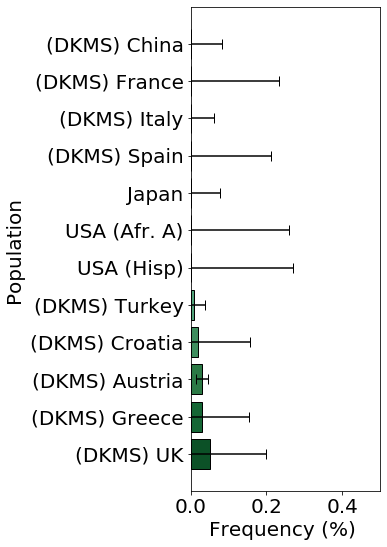

In [27]:
# Plot populations with 3 weak alleles
%matplotlib inline
plt.clf()
plt.rcParams.update({'font.size': 20})
ax=sns.barplot(data=weak3,x="Frequency (%) ",y="Population ", palette="BuGn", linewidth=1, edgecolor="0")
#ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
y = weak3["Population "].tolist()
x = weak3["Frequency (%) "].tolist()
#xmax = (HLAA4["EC50_max"]-HLAA4["EC50"]).tolist()
#xmin = (HLAA4["EC50"]-HLAA4["EC50_min"]).tolist()
#xerr=196*np.sqrt(weak3["Frequency (%) "]/100.*(1-weak3["Frequency (%) "]/100.)/(weak3["Sample Size "]))
#xerr=xerr.apply(lambda x: 0 if x ==0 else math.log(x))
plt.errorbar(x, y, xerr=xerr3, color="Black" ,ls='none',  capsize=5)
plt.xlim(0., 0.5)
ax = plt.gcf()
ax.set_size_inches(6, 8)
plt.tight_layout()
plt.savefig("../FIGURES/boxplot-3Haplo.png", dpi=150)

In [32]:
weak2=weak2.sort_values(by="Frequency (%) ")

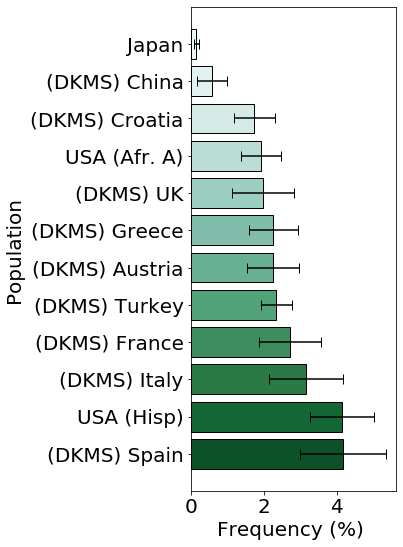

In [33]:
# Plot populations with 2 weak alleles
%matplotlib inline
plt.clf()
plt.rcParams.update({'font.size': 20})
ax=sns.barplot(data=weak2,x="Frequency (%) ",y="Population ", palette="BuGn", linewidth=1, edgecolor="0")
#ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax = plt.gcf()
y = weak2["Population "].tolist()
x = weak2["Frequency (%) "].tolist()
#xmax = (HLAA4["EC50_max"]-HLAA4["EC50"]).tolist()
#xmin = (HLAA4["EC50"]-HLAA4["EC50_min"]).tolist()
xerr=196*np.sqrt((weak2["Frequency (%) "]/100.)*(1.-weak2["Frequency (%) "]/100.)/weak2["Sample Size "])
plt.errorbar(x, y, xerr=xerr, color="Black" ,ls='none',  capsize=5)
ax.set_size_inches(6, 8)
plt.tight_layout()
plt.savefig("../FIGURES/boxplot-2Haplo.png", dpi=150)

In [50]:
#xerr=(weak2["Frequency (%) "]*(1-weak2["Frequency (%) "])/(weak2["Sample Size "]))

In [34]:
 weak1=weak1.sort_values(by="Frequency (%) ")

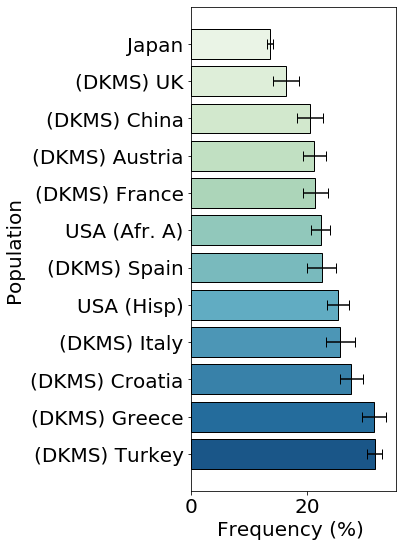

In [35]:
# Plot populations with 1 weak allele
%matplotlib inline
plt.clf()
plt.rcParams.update({'font.size': 20})
ax=sns.barplot(data=weak1,x="Frequency (%) ",y="Population ", palette="GnBu", linewidth=1, edgecolor="0")
#ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
y = weak1["Population "].tolist()
x = weak1["Frequency (%) "].tolist()
#xmax = (HLAA4["EC50_max"]-HLAA4["EC50"]).tolist()
#xmin = (HLAA4["EC50"]-HLAA4["EC50_min"]).tolist()
xerr=196*np.sqrt((weak1["Frequency (%) "]/100.)*(1.-weak1["Frequency (%) "]/100.)/weak1["Sample Size "])
plt.errorbar(x, y, xerr=xerr, color="Black" ,ls='none',  capsize=5)
ax = plt.gcf()
ax.set_size_inches(6, 8)
plt.tight_layout()
plt.savefig("../FIGURES/boxplot-1Haplo.png", dpi=150)

In [36]:
# check population covered 
check=data_ABC.groupby(["Population "],as_index=False).sum()


In [37]:
check

,Population,Frequency (%),Sample Size
0,(DKMS) Austria,97.79,1130868
1,(DKMS) China,97.39,811506
2,(DKMS) Croatia,95.87,1349392
3,(DKMS) France,100.01,925148
4,(DKMS) Greece,100.53,1522776
5,(DKMS) Italy,93.59,722057
6,(DKMS) Spain,99.40,666414
7,(DKMS) Turkey,96.90,6851816
8,(DKMS) UK,96.63,466221
9,Japan,109.83,17338928


The following analysis computes the distribution of scores across the various populations

In [38]:
# load scores
scores=pd.read_csv("../Data/Covid_summary.csv")

In [39]:
# reformat data
scores=scores[["allele","EC50"]].copy()
scores["allele"]=scores["allele"].map(lambda x: str(x)[4:])

In [40]:
# associate scores to alleles: construct dictionary
scores_dict=scores.set_index('allele').T.to_dict("records")[0]

In [42]:
# associate scores to alleles: associate
data_ABC["scoreA"]=data_ABC["A"].map(scores_dict)
data_ABC["scoreB"]=data_ABC["B"].map(scores_dict)
data_ABC["scoreC"]=data_ABC["C"].map(scores_dict)

In [43]:
#compute total score
data_ABC["score"]=data_ABC["scoreA"]+data_ABC["scoreB"]+data_ABC["scoreC"]

In [44]:
#data_clean=data_ABC.dropna().copy()
#data_clean=data_ABC.fillna(100).copy()
data_clean=data_ABC

In [58]:
# create bins for A,B,C
data_clean["score HLA-A"]=10*np.trunc(data_clean["scoreA"]/10.)+5
data_clean["score HLA-B"]=10*np.trunc(data_clean["scoreB"]/10.)+5
data_clean["score HLA-C"]=10*np.trunc(data_clean["scoreC"]/10.)+5

In [59]:
# aggregate frequencies into bins
data_groupA=data_clean.groupby(["Population ","score HLA-A"]).sum()
data_groupB=data_clean.groupby(["Population ","score HLA-B"]).sum()
data_groupC=data_clean.groupby(["Population ","score HLA-C"]).sum()

In [60]:
data_groupA=data_groupA.reset_index()
data_groupB=data_groupB.reset_index()
data_groupC=data_groupC.reset_index()

The following analysis is used to plot the frequency of the populations havinf HLA-A and HLA-B with high score for T-cell propensity

In [66]:
# find data with strong A and strong B
strongA=["A*02:02","A*11:01"]
strongB=["B*40:01","B35:01"]
strong_AB=data_ABC[(data_ABC["A"].isin(strongA))\
                  &(data_ABC["B"].isin(strongB))]

In [67]:
strong1=strong_AB.groupby(["Population "],as_index=False).agg({'Frequency (%) ':'sum','Sample Size ':'max'})

In [68]:
strong_AB1=data_ABC[(data_ABC["A"].isin(strongA))\
                  |(data_ABC["B"].isin(strongB))]

In [69]:
strong2=strong_AB1.groupby(["Population "],as_index=False).agg({'Frequency (%) ':'sum','Sample Size ':'max'})

In [70]:
strong2=strong2.sort_values(by="Frequency (%) ",ascending=False)

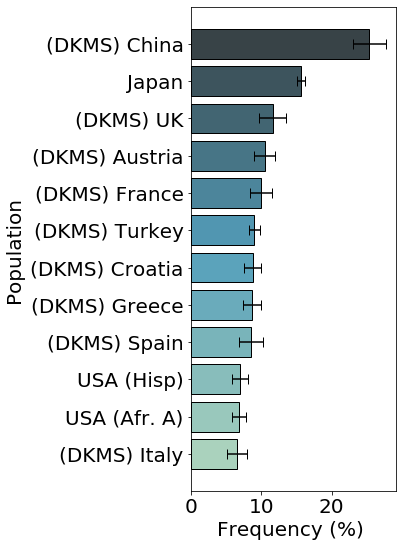

In [71]:
%matplotlib inline
plt.clf()
plt.rcParams.update({'font.size': 20})
ax=sns.barplot(data=strong2,x="Frequency (%) ",y="Population ", palette="GnBu_d", linewidth=1, edgecolor="0")
#ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
y = strong2["Population "].tolist()
x = strong2["Frequency (%) "].tolist()
#xmax = (HLAA4["EC50_max"]-HLAA4["EC50"]).tolist()
#xmin = (HLAA4["EC50"]-HLAA4["EC50_min"]).tolist()
xerr=196*np.sqrt((strong2["Frequency (%) "]/100.)*(1.-strong2["Frequency (%) "]/100.)/strong2["Sample Size "])
plt.errorbar(x, y, xerr=xerr, color="Black" ,ls='none',  capsize=5)
ax = plt.gcf()
ax.set_size_inches(6, 8)
plt.tight_layout()
plt.savefig("../FIGURES/boxplot-1_Haplo_strong.png", dpi=150)

In [72]:
strong1=strong1.sort_values(by="Frequency (%) ",ascending=False)

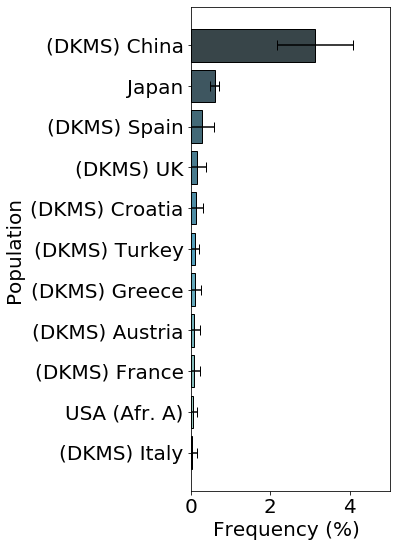

In [73]:
%matplotlib inline
plt.clf()
plt.rcParams.update({'font.size': 20})
ax=sns.barplot(data=strong1,x="Frequency (%) ",y="Population ", palette="GnBu_d", linewidth=1, edgecolor="0")
#ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
y = strong1["Population "].tolist()
x = strong1["Frequency (%) "].tolist()
#xmax = (HLAA4["EC50_max"]-HLAA4["EC50"]).tolist()
#xmin = (HLAA4["EC50"]-HLAA4["EC50_min"]).tolist()
xerr=196*np.sqrt((strong1["Frequency (%) "]/100.)*(1.-strong1["Frequency (%) "]/100.)/strong1["Sample Size "])
plt.errorbar(x, y, xerr=xerr, color="Black" ,ls='none',  capsize=5)
ax = plt.gcf()
plt.xlim(0., 5.)
ax.set_size_inches(6, 8)
plt.tight_layout()
plt.savefig("../FIGURES/boxplot-2_Haplo_strong.png", dpi=150)

The following is used to estimate the prevalence of the 79 alleles studied across the various human populations

In [74]:
# compute frequency of supported alleles for each population
present_A=data_ABC[data_ABC["A"].isin(alleles)].copy()
present_B=data_ABC[data_ABC["B"].isin(alleles)].copy()
present_C=data_ABC[data_ABC["C"].isin(alleles)].copy()

In [75]:
coverage_A=present_A.groupby(["Population "],as_index=False).sum()
coverage_B=present_B.groupby(["Population "],as_index=False).sum()
coverage_C=present_C.groupby(["Population "],as_index=False).sum()

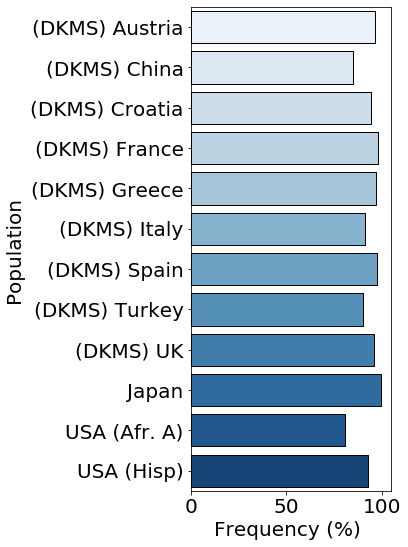

In [81]:
%matplotlib inline
plt.clf()
plt.rcParams.update({'font.size': 20})
ax=sns.barplot(data=coverage_A,x="Frequency (%) ",y="Population ", palette="Blues", linewidth=1, edgecolor="0")
#ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
#y = strong1["Population "].tolist()
#x = strong1["Frequency (%) "].tolist()
#xmax = (HLAA4["EC50_max"]-HLAA4["EC50"]).tolist()
#xmin = (HLAA4["EC50"]-HLAA4["EC50_min"]).tolist()
#xerr=196*np.sqrt((strong1["Frequency (%) "]/100.)*(1.-strong1["Frequency (%) "]/100.)/strong1["Sample Size "])
#plt.errorbar(x, y, xerr=xerr, color="Black" ,ls='none',  capsize=5)
ax = plt.gcf()
#plt.xlim(0., 5.)
ax.set_size_inches(6, 8)
plt.tight_layout()
plt.savefig("../FIGURES/prevalence-HLA-A.png", dpi=150)

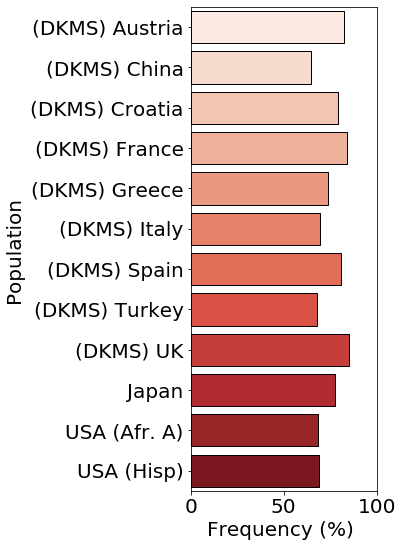

In [82]:
%matplotlib inline
plt.clf()
plt.rcParams.update({'font.size': 20})
ax=sns.barplot(data=coverage_B,x="Frequency (%) ",y="Population ", palette="Reds", linewidth=1, edgecolor="0")
#ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
#y = strong1["Population "].tolist()
#x = strong1["Frequency (%) "].tolist()
#xmax = (HLAA4["EC50_max"]-HLAA4["EC50"]).tolist()
#xmin = (HLAA4["EC50"]-HLAA4["EC50_min"]).tolist()
#xerr=196*np.sqrt((strong1["Frequency (%) "]/100.)*(1.-strong1["Frequency (%) "]/100.)/strong1["Sample Size "])
#plt.errorbar(x, y, xerr=xerr, color="Black" ,ls='none',  capsize=5)
ax = plt.gcf()
plt.xlim(0., 100.)
ax.set_size_inches(6, 8)
plt.tight_layout()
plt.savefig("../FIGURES/prevalence-HLA-B.png", dpi=150)

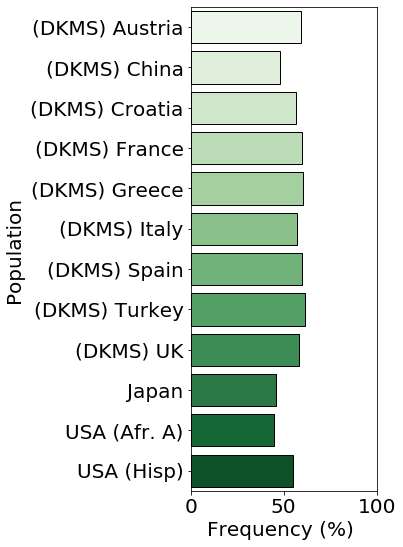

In [83]:
%matplotlib inline
plt.clf()
plt.rcParams.update({'font.size': 20})
ax=sns.barplot(data=coverage_C,x="Frequency (%) ",y="Population ", palette="Greens", linewidth=1, edgecolor="0")
#ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
#y = strong1["Population "].tolist()
#x = strong1["Frequency (%) "].tolist()
#xmax = (HLAA4["EC50_max"]-HLAA4["EC50"]).tolist()
#xmin = (HLAA4["EC50"]-HLAA4["EC50_min"]).tolist()
#xerr=196*np.sqrt((strong1["Frequency (%) "]/100.)*(1.-strong1["Frequency (%) "]/100.)/strong1["Sample Size "])
#plt.errorbar(x, y, xerr=xerr, color="Black" ,ls='none',  capsize=5)
ax = plt.gcf()
plt.xlim(0., 100.)
ax.set_size_inches(6, 8)
plt.tight_layout()
plt.savefig("../FIGURES/prevalence-HLA-C.png", dpi=150)

In [154]:
coverage_A

,Population,Frequency (%),Sample Size
0,(DKMS) Austria,96.00,1068042
1,(DKMS) China,84.66,680742
2,(DKMS) Croatia,94.24,1279454
3,(DKMS) France,97.90,864690
4,(DKMS) Greece,96.74,1361786
5,(DKMS) Italy,91.13,666425
6,(DKMS) Spain,97.04,628776
7,(DKMS) Turkey,90.08,5866048
8,(DKMS) UK,95.43,443275
9,Japan,99.33,14213456


In [156]:
coverage_C

,Population,Frequency (%),Sample Size
0,(DKMS) Austria,59.29,609582
1,(DKMS) China,48.28,437162
2,(DKMS) Croatia,56.67,744634
3,(DKMS) France,59.64,506160
4,(DKMS) Greece,60.20,789798
5,(DKMS) Italy,56.93,376675
6,(DKMS) Spain,60.07,346491
7,(DKMS) Turkey,61.54,3559448
8,(DKMS) UK,58.02,260750
9,Japan,46.10,8427612


Supported alleles for NetTepi. Estimate of the coverage.
The 13 alleles are 'HLA-B*40:01', 'HLA-A*02:01', 'HLA-A*24:02', 'HLA-B*07:02', 'HLA-A*26:01', 'HLA-B*58:01', 'HLA-B*35:01', 'HLA-B*15:01', 'HLA-A*03:01', 'HLA-A*11:01', 'HLA-B*39:01', 'HLA-A*01:01', 'HLA-B*27:05'

In [92]:
HLA_nettepi=['A*02:01','A*03:01','A*24:02','A*26:01','A*11:01','A01:01']
HLB_nettepi=['B*40:01','B*07:02','B*15:01','B*58:01','B*35:01','B*39:01','B*27:05']

In [93]:
# compute frequency of supported alleles for each population
pnt_A=data_ABC[data_ABC["A"].isin(HLA_nettepi)].copy()
pnt_B=data_ABC[data_ABC["B"].isin(HLB_nettepi)].copy()


In [94]:
cover_nt_A=pnt_A.groupby(["Population "],as_index=False).sum()
cover_nt_B=pnt_B.groupby(["Population "],as_index=False).sum()

In [98]:
cover_nt_B

,Population,Frequency (%),Sample Size,scoreA,scoreB,scoreC,score,score HLA-A,score HLA-B,score HLA-C
0,(DKMS) Austria,33.97,292056,939.991937,1076.165912,1452.954732,2379.364937,1185.0,1220.0,1225.0
1,(DKMS) China,28.90,214094,1324.692371,1252.095075,1503.183494,2666.928735,1600.0,1455.0,1225.0
2,(DKMS) Croatia,24.63,298265,842.308277,857.505690,1442.147405,2260.116789,1090.0,955.0,1225.0
3,(DKMS) France,34.64,222148,789.478751,1049.897738,1471.281275,2382.882007,1030.0,1210.0,1215.0
4,(DKMS) Greece,21.71,306828,797.658703,1000.161300,1454.288905,2013.210357,1050.0,1140.0,1235.0
5,(DKMS) Italy,21.98,144875,751.868950,724.544088,1128.370796,1886.465489,940.0,855.0,945.0
6,(DKMS) Spain,25.61,147231,711.656570,812.829854,1049.178238,1670.537563,895.0,875.0,855.0
7,(DKMS) Turkey,20.34,1359680,1511.025349,1606.173010,2442.137769,3659.501902,1950.0,1950.0,2065.0
8,(DKMS) UK,35.43,123074,711.547227,767.544257,995.908182,1750.010090,910.0,860.0,830.0
9,Japan,34.03,4930060,2079.216500,1811.409922,2293.099914,3928.845504,2550.0,2225.0,1975.0
